In [ ]:
from functools import reduce
import pandas as pd
from pathlib import Path

In [ ]:
PROJPATH = Path().resolve().parent
datadir = PROJPATH / "data/DDforecast_2024"
pattern = "daily_report*.csv"
filepths = sorted(list(datadir.glob(pattern)))
filepths

[PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-09.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-10.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-11.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-12.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-13.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-14.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-15.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-16.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforecast_2024/daily_report_2024-04-17.csv'),
 PosixPath('/Users/christine/Projects/2023_Riverice/data/DDforec

In [ ]:
dfs = {pth.stem[-10:]:pd.read_csv(pth)[['location', 'river', 'average breakup date', 'forecasted date']] 
       for pth in filepths}
for df in dfs:
    dfs[df].rename(columns={'forecasted date': df}, inplace=True)

In [ ]:
df_merged = reduce(lambda x, y: pd.merge(x, y, 
                                         on=['location', 'river', 'average breakup date'],
                                         how='left'), dfs.values())
# df_merged.columns = ['location', 'river', 'average breakup date'] + forcastdates
df_merged

,location,river,average breakup date,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14,2024-04-15,...,2024-05-11,2024-05-13,2024-05-14,2024-05-16,2024-05-18,2024-05-19,2024-05-20,2024-05-21,2024-05-22,2024-05-23
0,Buckland,Buckland River,05-15,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,...,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-15,2024-05-15
1,Fairbanks,Chena River,04-24,2024-04-21,2024-04-22,2024-04-22,2024-04-23,2024-04-23,2024-04-23,2024-04-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Northway,Chisana River,04-23,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24,...,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24,2024-04-24
3,Gakona,Gakona River,04-29,2024-05-01,2024-05-01,2024-05-01,2024-05-01,2024-05-01,2024-05-01,2024-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gakona,Gulkana River,04-28,2024-04-29,2024-04-29,2024-04-29,2024-04-29,2024-04-29,2024-04-29,2024-04-29,...,2024-04-30,2024-04-30,2024-04-30,2024-04-30,2024-04-30,2024-04-30,2024-04-30,2024-04-30,2024-04-30,2024-04-30
5,Kobuk,Kobuk River,05-13,2024-05-13,2024-05-13,2024-05-13,2024-05-14,2024-05-14,2024-05-14,2024-05-14,...,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14
6,Shungnak,Kobuk River,05-15,2024-05-14,2024-05-14,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,...,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15
7,Ambler,Kobuk River,05-16,2024-05-15,2024-05-15,2024-05-16,2024-05-16,2024-05-16,2024-05-17,2024-05-17,...,2024-05-17,2024-05-17,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16
8,Bettles,Koyukuk River,05-07,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,...,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09
9,Allakaket,Koyukuk River,05-08,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,...,2024-05-11,2024-05-11,2024-05-11,2024-05-11,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10


In [ ]:
actualfpth = PROJPATH / "data/breakupdata/NWS-APRFC_AK_BreakupDate-2024.csv"
actualbreakup = pd.read_csv(actualfpth, escapechar="\\")
actualbreakup = actualbreakup[actualbreakup['year']==2024][['siteID', 'breakup']]
actualbreakup['siteID'] = actualbreakup['siteID'].str.replace(' nr ', ' at ')
actualbreakup

,siteID,breakup
0,Sagavanirktok River at Deadhorse,2024-06-06
1,Colville River at Colville Village,2023-06-08
2,Colville River at Umiat,2024-06-04
3,Koyukuk River at Hughes,2024-05-11
4,Koyukuk River at Allakaket,2024-05-10
...,...,...
63,Skwentna River at Skwentna,2024-04-23
64,Moose River at Sterling,2024-04-17
65,Kuskokwim River at Nikolai,2024-04-16
66,Moose Creek at Oilwell Road,2024-04-02


In [ ]:
actualbreakup[['river', 'location']] = actualbreakup.siteID.str.split(' at ', n=1, expand=True)

In [ ]:
actualbreakup

,siteID,breakup,river,location
0,Sagavanirktok River at Deadhorse,2024-06-06,Sagavanirktok River,Deadhorse
1,Colville River at Colville Village,2023-06-08,Colville River,Colville Village
2,Colville River at Umiat,2024-06-04,Colville River,Umiat
3,Koyukuk River at Hughes,2024-05-11,Koyukuk River,Hughes
4,Koyukuk River at Allakaket,2024-05-10,Koyukuk River,Allakaket
...,...,...,...,...
63,Skwentna River at Skwentna,2024-04-23,Skwentna River,Skwentna
64,Moose River at Sterling,2024-04-17,Moose River,Sterling
65,Kuskokwim River at Nikolai,2024-04-16,Kuskokwim River,Nikolai
66,Moose Creek at Oilwell Road,2024-04-02,Moose Creek,Oilwell Road


In [ ]:
evalDF = pd.merge(left=df_merged, right=actualbreakup, left_on=['river', 'location'], right_on=['river', 'location'])
evalDF

,location,river,average breakup date,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14,2024-04-15,...,2024-05-14,2024-05-16,2024-05-18,2024-05-19,2024-05-20,2024-05-21,2024-05-22,2024-05-23,siteID,breakup
0,Buckland,Buckland River,05-15,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,...,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-15,2024-05-15,Buckland River at Buckland,2024-05-17
1,Fairbanks,Chena River,04-24,2024-04-21,2024-04-22,2024-04-22,2024-04-23,2024-04-23,2024-04-23,2024-04-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chena River at Fairbanks,2024-04-22
2,Gakona,Gakona River,04-29,2024-05-01,2024-05-01,2024-05-01,2024-05-01,2024-05-01,2024-05-01,2024-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gakona River at Gakona,2024-05-03
3,Kobuk,Kobuk River,05-13,2024-05-13,2024-05-13,2024-05-13,2024-05-14,2024-05-14,2024-05-14,2024-05-14,...,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,2024-05-14,Kobuk River at Kobuk,2024-05-17
4,Shungnak,Kobuk River,05-15,2024-05-14,2024-05-14,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,...,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,2024-05-15,Kobuk River at Shungnak,2024-05-17
5,Ambler,Kobuk River,05-16,2024-05-15,2024-05-15,2024-05-16,2024-05-16,2024-05-16,2024-05-17,2024-05-17,...,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,2024-05-16,Kobuk River at Ambler,2024-05-18
6,Bettles,Koyukuk River,05-07,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,...,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,Koyukuk River at Bettles,2024-05-10
7,Allakaket,Koyukuk River,05-08,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,...,2024-05-11,2024-05-11,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,Koyukuk River at Allakaket,2024-05-10
8,Hughes,Koyukuk River,05-08,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,2024-05-09,...,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,2024-05-10,Koyukuk River at Hughes,2024-05-11
9,Nikolai,Kuskokwim River,04-20,2024-04-18,2024-04-18,2024-04-18,2024-04-19,2024-04-19,2024-04-19,2024-04-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kuskokwim River at Nikolai,2024-04-16


In [ ]:
evalDF.columns

Index(['location', 'river', 'average breakup date', '2024-04-09', '2024-04-10',
       '2024-04-11', '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15',
       '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
       '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
       '2024-04-26', '2024-04-27', '2024-04-29', '2024-04-30', '2024-05-01',
       '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06',
       '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-11',
       '2024-05-13', '2024-05-14', '2024-05-16', '2024-05-18', '2024-05-19',
       '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', 'siteID',
       'breakup'],
      dtype='object')

In [ ]:
for col in ['2024-04-09', '2024-04-10',
       '2024-04-11', '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15',
       '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
       '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
       '2024-04-26', '2024-04-27', '2024-04-29', '2024-04-30', '2024-05-01',
       '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06',
       '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-11',
       '2024-05-13', '2024-05-14', '2024-05-16', '2024-05-18', '2024-05-19',
       '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', ]:
       evalDF[col] = (pd.to_datetime(evalDF[col]) - pd.to_datetime(evalDF['breakup'])).dt.days
       

In [ ]:
evalDF

,location,river,average breakup date,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14,2024-04-15,...,2024-05-14,2024-05-16,2024-05-18,2024-05-19,2024-05-20,2024-05-21,2024-05-22,2024-05-23,siteID,breakup
0,Buckland,Buckland River,05-15,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,Buckland River at Buckland,2024-05-17
1,Fairbanks,Chena River,04-24,-1,0,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chena River at Fairbanks,2024-04-22
2,Gakona,Gakona River,04-29,-2,-2,-2,-2,-2,-2,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gakona River at Gakona,2024-05-03
3,Kobuk,Kobuk River,05-13,-4,-4,-4,-3,-3,-3,-3,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,Kobuk River at Kobuk,2024-05-17
4,Shungnak,Kobuk River,05-15,-3,-3,-2,-2,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Shungnak,2024-05-17
5,Ambler,Kobuk River,05-16,-3,-3,-2,-2,-2,-1,-1,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Ambler,2024-05-18
6,Bettles,Koyukuk River,05-07,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Bettles,2024-05-10
7,Allakaket,Koyukuk River,05-08,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Koyukuk River at Allakaket,2024-05-10
8,Hughes,Koyukuk River,05-08,-2,-2,-2,-2,-2,-2,-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Hughes,2024-05-11
9,Nikolai,Kuskokwim River,04-20,2,2,2,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kuskokwim River at Nikolai,2024-04-16


In [ ]:
evalDF_transposed = evalDF.drop(columns=['location', 'river', 'average breakup date', 'breakup']).T
evalDF_transposed.columns = evalDF_transposed.loc['siteID']
evalDF_transposed.drop(labels='siteID', axis=0)


siteID,Buckland River at Buckland,Chena River at Fairbanks,Gakona River at Gakona,Kobuk River at Kobuk,Kobuk River at Shungnak,Kobuk River at Ambler,Koyukuk River at Bettles,Koyukuk River at Allakaket,Koyukuk River at Hughes,Kuskokwim River at Nikolai,...,Yukon River at Ruby,Yukon River at Galena,Yukon River at Kaltag,Yukon River at Holy Cross,Yukon River at Marshall,Yukon River at Russian Mission,Yukon River at Anvik,Yukon River at Mountain Village,Yukon River at Emmonak,Yukon River at Alakanuk
2024-04-09,-1,-1,-2,-4,-3,-3,-1,0,-2,2,...,-4,0,-3,3,3,1,-3,-5,-4,-4
2024-04-10,-1,0,-2,-4,-3,-3,-1,0,-2,2,...,-3,0,-3,3,3,1,-3,-5,-4,-3
2024-04-11,-1,0,-2,-4,-2,-2,-1,0,-2,2,...,-3,0,-3,3,3,1,-2,-5,-4,-3
2024-04-12,-1,1,-2,-3,-2,-2,-1,0,-2,3,...,-3,0,-3,3,3,1,-2,-5,-3,-3
2024-04-13,-1,1,-2,-3,-2,-2,-1,0,-2,3,...,-3,0,-3,4,4,2,-2,-5,-3,-3
2024-04-14,-1,1,-2,-3,-2,-1,-1,0,-2,3,...,-3,0,-2,4,4,2,-2,-5,-3,-3
2024-04-15,-1,1,-2,-3,-2,-1,-1,0,-2,3,...,-3,0,-2,4,4,2,-2,-5,-3,-2
2024-04-16,-1,1,-2,-3,-2,-1,-1,1,-2,3,...,-3,0,-2,4,4,2,-2,-4,-3,-2
2024-04-17,-1,1,-2,-3,-2,-1,-1,1,-1,4,...,-3,0,-2,4,5,2,-2,-4,-3,-2
2024-04-18,-1,2,-1,-3,-2,-1,0,1,-1,4,...,-3,0,-2,4,5,2,-1,-4,-2,-2


In [ ]:
evalDF.to_csv("eval_2024.csv")

### plotting

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
plotDF = evalDF_transposed.drop(labels='siteID', axis=0).astype(float)

In [ ]:
sns.set_context('paper')
cmap = sns.color_palette("coolwarm", 12)

Text(0.5, 1.0, 'forecast error (days)')

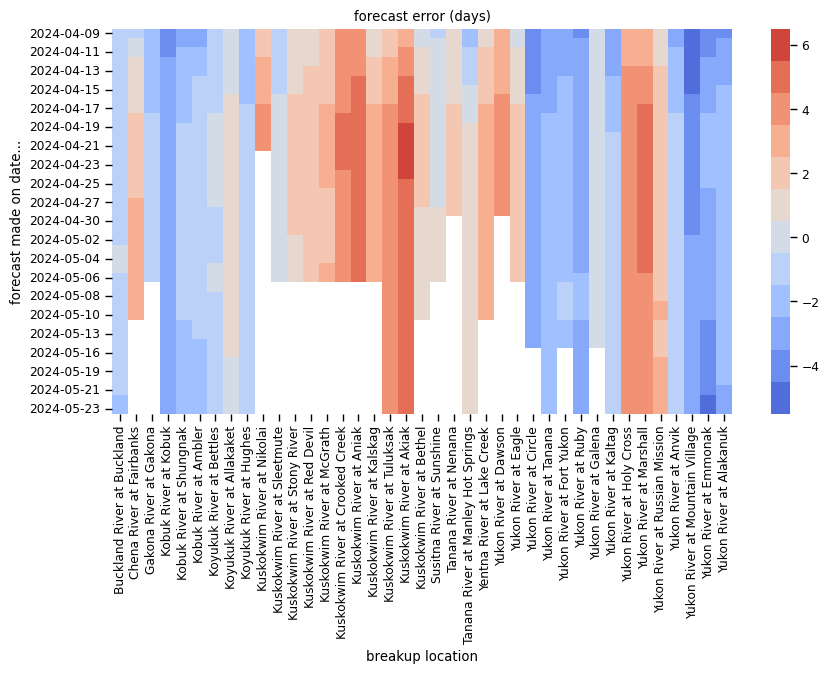

In [ ]:
figure = plt.figure(figsize=(10, 5))
sns.heatmap(plotDF, cmap=cmap, vmax=6.5, vmin=-5.5)
plt.ylabel('forecast made on date...')
plt.xlabel('breakup location')
plt.title('forecast error (days)')

In [ ]:
evalDF

,location,river,average breakup date,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14,2024-04-15,...,2024-05-14,2024-05-16,2024-05-18,2024-05-19,2024-05-20,2024-05-21,2024-05-22,2024-05-23,siteID,breakup
0,Buckland,Buckland River,05-15,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,Buckland River at Buckland,2024-05-17
1,Fairbanks,Chena River,04-24,-1,0,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chena River at Fairbanks,2024-04-22
2,Gakona,Gakona River,04-29,-2,-2,-2,-2,-2,-2,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gakona River at Gakona,2024-05-03
3,Kobuk,Kobuk River,05-13,-4,-4,-4,-3,-3,-3,-3,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,Kobuk River at Kobuk,2024-05-17
4,Shungnak,Kobuk River,05-15,-3,-3,-2,-2,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Shungnak,2024-05-17
5,Ambler,Kobuk River,05-16,-3,-3,-2,-2,-2,-1,-1,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Ambler,2024-05-18
6,Bettles,Koyukuk River,05-07,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Bettles,2024-05-10
7,Allakaket,Koyukuk River,05-08,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Koyukuk River at Allakaket,2024-05-10
8,Hughes,Koyukuk River,05-08,-2,-2,-2,-2,-2,-2,-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Hughes,2024-05-11
9,Nikolai,Kuskokwim River,04-20,2,2,2,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kuskokwim River at Nikolai,2024-04-16


In [ ]:
evalDF = evalDF.ffill(axis=1)

In [ ]:
evalDF

,location,river,average breakup date,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14,2024-04-15,...,2024-05-14,2024-05-16,2024-05-18,2024-05-19,2024-05-20,2024-05-21,2024-05-22,2024-05-23,siteID,breakup
0,Buckland,Buckland River,05-15,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,Buckland River at Buckland,2024-05-17
1,Fairbanks,Chena River,04-24,-1,0,0,1,1,1,1,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Chena River at Fairbanks,2024-04-22
2,Gakona,Gakona River,04-29,-2,-2,-2,-2,-2,-2,-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Gakona River at Gakona,2024-05-03
3,Kobuk,Kobuk River,05-13,-4,-4,-4,-3,-3,-3,-3,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,Kobuk River at Kobuk,2024-05-17
4,Shungnak,Kobuk River,05-15,-3,-3,-2,-2,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Shungnak,2024-05-17
5,Ambler,Kobuk River,05-16,-3,-3,-2,-2,-2,-1,-1,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Ambler,2024-05-18
6,Bettles,Koyukuk River,05-07,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Bettles,2024-05-10
7,Allakaket,Koyukuk River,05-08,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Koyukuk River at Allakaket,2024-05-10
8,Hughes,Koyukuk River,05-08,-2,-2,-2,-2,-2,-2,-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Hughes,2024-05-11
9,Nikolai,Kuskokwim River,04-20,2,2,2,3,3,3,3,...,4,4,4,4,4,4,4,4,Kuskokwim River at Nikolai,2024-04-16


In [ ]:
evalDF_transposed = evalDF_transposed.ffill()

In [ ]:
evalDF_transposed.drop(labels='siteID', axis=0).mean()

siteID
Buckland River at Buckland            -0.97561
Chena River at Fairbanks              2.243902
Gakona River at Gakona               -1.219512
Kobuk River at Kobuk                 -3.073171
Kobuk River at Shungnak              -1.536585
Kobuk River at Ambler                -1.365854
Koyukuk River at Bettles             -0.682927
Koyukuk River at Allakaket            0.682927
Koyukuk River at Hughes              -1.195122
Kuskokwim River at Nikolai            3.731707
Kuskokwim River at Sleetmute         -0.170732
Kuskokwim River at Stony River        1.365854
Kuskokwim River at Red Devil          1.902439
Kuskokwim River at McGrath            2.609756
Kuskokwim River at Crooked Creek      4.146341
Kuskokwim River at Aniak              4.878049
Kuskokwim River at Kalskag            2.731707
Kuskokwim River at Tuluksak           3.731707
Kuskokwim River at Akiak               4.97561
Kuskokwim River at Bethel             1.243902
Susitna River at Sunshine             0.512195
Tanana

In [ ]:
evalDF.river.value_counts()

river
Yukon River        15
Kuskokwim River    11
Koyukuk River       3
Kobuk River         3
Tanana River        2
Buckland River      1
Chena River         1
Gakona River        1
Susitna River       1
Yentna River        1
Name: count, dtype: int64

In [ ]:
evalDF

,location,river,average breakup date,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14,2024-04-15,...,2024-05-14,2024-05-16,2024-05-18,2024-05-19,2024-05-20,2024-05-21,2024-05-22,2024-05-23,siteID,breakup
0,Buckland,Buckland River,05-15,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,Buckland River at Buckland,2024-05-17
1,Fairbanks,Chena River,04-24,-1,0,0,1,1,1,1,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Chena River at Fairbanks,2024-04-22
2,Gakona,Gakona River,04-29,-2,-2,-2,-2,-2,-2,-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Gakona River at Gakona,2024-05-03
3,Kobuk,Kobuk River,05-13,-4,-4,-4,-3,-3,-3,-3,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,Kobuk River at Kobuk,2024-05-17
4,Shungnak,Kobuk River,05-15,-3,-3,-2,-2,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Shungnak,2024-05-17
5,Ambler,Kobuk River,05-16,-3,-3,-2,-2,-2,-1,-1,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Ambler,2024-05-18
6,Bettles,Koyukuk River,05-07,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Bettles,2024-05-10
7,Allakaket,Koyukuk River,05-08,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Koyukuk River at Allakaket,2024-05-10
8,Hughes,Koyukuk River,05-08,-2,-2,-2,-2,-2,-2,-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Hughes,2024-05-11
9,Nikolai,Kuskokwim River,04-20,2,2,2,3,3,3,3,...,4,4,4,4,4,4,4,4,Kuskokwim River at Nikolai,2024-04-16


Text(0.5, 1.0, 'average forecast error')

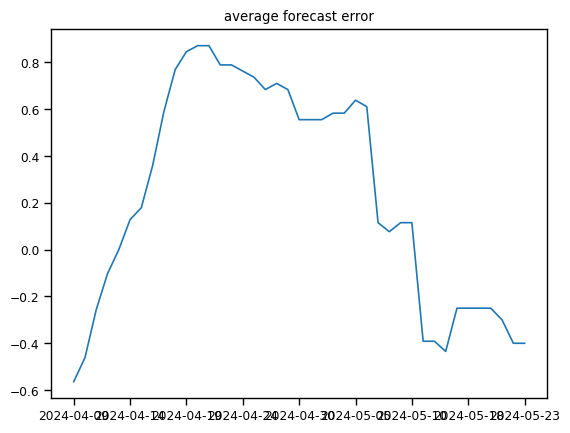

In [ ]:
evalDF.drop(columns=['location', 'river', 'average breakup date', 'siteID', 'breakup']).mean(axis=0).plot()
plt.title("average forecast error")

In [ ]:
evalDF.columns

Index(['location', 'river', 'average breakup date', '2024-04-09', '2024-04-10',
       '2024-04-11', '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15',
       '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
       '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
       '2024-04-26', '2024-04-27', '2024-04-29', '2024-04-30', '2024-05-01',
       '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06',
       '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-11',
       '2024-05-13', '2024-05-14', '2024-05-16', '2024-05-18', '2024-05-19',
       '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', 'siteID',
       'breakup'],
      dtype='object')

In [ ]:
evalDF_transposed.drop(labels='siteID', axis=0).reset_index().melt(
    'index', var_name='location', 
    value_name='forecast error (days)')

,index,location,forecast error (days)
0,2024-04-09,Buckland River at Buckland,-1
1,2024-04-10,Buckland River at Buckland,-1
2,2024-04-11,Buckland River at Buckland,-1
3,2024-04-12,Buckland River at Buckland,-1
4,2024-04-13,Buckland River at Buckland,-1
...,...,...,...
1594,2024-05-19,Yukon River at Alakanuk,-2.0
1595,2024-05-20,Yukon River at Alakanuk,-2.0
1596,2024-05-21,Yukon River at Alakanuk,-3.0
1597,2024-05-22,Yukon River at Alakanuk,-3.0


In [ ]:
evalDF['avg_error'] = evalDF.drop(columns=['location', 'river', 'average breakup date', 'siteID', 'breakup']).mean(axis=1)
evalDF[['river', 'avg_error']].groupby(by='river').mean()

,avg_error
river,
Buckland River,-0.97561
Chena River,2.243902
Gakona River,-1.219512
Kobuk River,-1.99187
Koyukuk River,-0.398374
Kuskokwim River,2.831486
Susitna River,0.512195
Tanana River,1.182927
Yentna River,2.756098


In [ ]:
evalDF[['river', 'avg_error']].groupby(by='river').std()

,avg_error
river,
Buckland River,NaN
Chena River,NaN
Gakona River,NaN
Kobuk River,0.940317
Koyukuk River,0.970822
Kuskokwim River,1.635218
Susitna River,NaN
Tanana River,0.879572
Yentna River,NaN


In [ ]:
evalDF

,location,river,average breakup date,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14,2024-04-15,...,2024-05-16,2024-05-18,2024-05-19,2024-05-20,2024-05-21,2024-05-22,2024-05-23,siteID,breakup,avg_error
0,Buckland,Buckland River,05-15,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,Buckland River at Buckland,2024-05-17,-0.97561
1,Fairbanks,Chena River,04-24,-1,0,0,1,1,1,1,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Chena River at Fairbanks,2024-04-22,2.243902
2,Gakona,Gakona River,04-29,-2,-2,-2,-2,-2,-2,-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Gakona River at Gakona,2024-05-03,-1.219512
3,Kobuk,Kobuk River,05-13,-4,-4,-4,-3,-3,-3,-3,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,Kobuk River at Kobuk,2024-05-17,-3.073171
4,Shungnak,Kobuk River,05-15,-3,-3,-2,-2,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Shungnak,2024-05-17,-1.536585
5,Ambler,Kobuk River,05-16,-3,-3,-2,-2,-2,-1,-1,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,Kobuk River at Ambler,2024-05-18,-1.365854
6,Bettles,Koyukuk River,05-07,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Bettles,2024-05-10,-0.682927
7,Allakaket,Koyukuk River,05-08,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Koyukuk River at Allakaket,2024-05-10,0.682927
8,Hughes,Koyukuk River,05-08,-2,-2,-2,-2,-2,-2,-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Koyukuk River at Hughes,2024-05-11,-1.195122
9,Nikolai,Kuskokwim River,04-20,2,2,2,3,3,3,3,...,4,4,4,4,4,4,4,Kuskokwim River at Nikolai,2024-04-16,3.731707


In [ ]:
evalDF[evalDF.river.isin(['Yukon River', 'Kuskokwim River'])].drop(columns=['location', 'siteID', 'avg_error', 'average breakup date', 'breakup'])

,river,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14,2024-04-15,2024-04-16,2024-04-17,...,2024-05-11,2024-05-13,2024-05-14,2024-05-16,2024-05-18,2024-05-19,2024-05-20,2024-05-21,2024-05-22,2024-05-23
9,Kuskokwim River,2,2,2,3,3,3,3,3,4,...,4,4,4,4,4,4,4,4,4,4
10,Kuskokwim River,-1,-1,-1,-1,-1,-1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Kuskokwim River,1,1,1,1,1,1,1,2,2,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12,Kuskokwim River,1,1,1,1,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
13,Kuskokwim River,2,2,2,2,2,2,2,2,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
14,Kuskokwim River,4,4,4,4,4,4,4,4,4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
15,Kuskokwim River,4,4,4,4,4,5,5,5,5,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
16,Kuskokwim River,1,1,1,2,2,2,2,2,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
17,Kuskokwim River,2,2,2,3,3,3,3,3,4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
18,Kuskokwim River,3,3,4,4,4,5,5,5,5,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
data = evalDF.drop(
    columns=['location', 'siteID', 'avg_error', 'average breakup date', 'breakup'])
# data = evalDF[evalDF.river.isin(['Yukon River', 'Kuskokwim River'])].drop(
#     columns=['location', 'siteID', 'avg_error', 'average breakup date', 'breakup'])
data = data.melt('river', var_name='forecast day', 
    value_name='forecast error (days)')

In [ ]:
data

,river,forecast day,forecast error (days)
0,Buckland River,2024-04-09,-1
1,Chena River,2024-04-09,-1
2,Gakona River,2024-04-09,-2
3,Kobuk River,2024-04-09,-4
4,Kobuk River,2024-04-09,-3
...,...,...,...
1594,Yukon River,2024-05-23,3.0
1595,Yukon River,2024-05-23,-1.0
1596,Yukon River,2024-05-23,-3.0
1597,Yukon River,2024-05-23,-5.0


/Users/christine/miniconda3/envs/fiweps_pancan/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christine/miniconda3/envs/fiweps_pancan/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christine/miniconda3/envs/fiweps_pancan/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christine/miniconda3/envs/fiweps_pancan/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

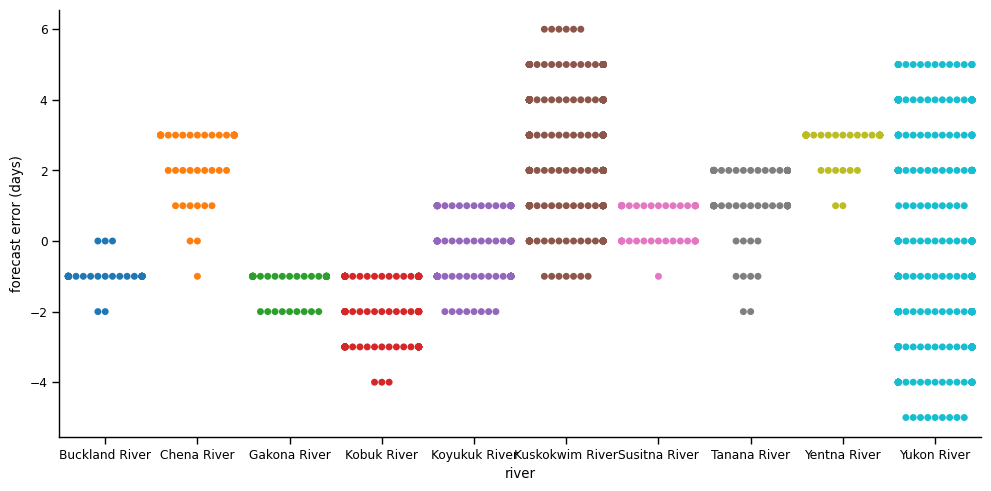

In [ ]:
sns.catplot(data=data, kind="swarm", x='river', y='forecast error (days)', hue='river', aspect=2)

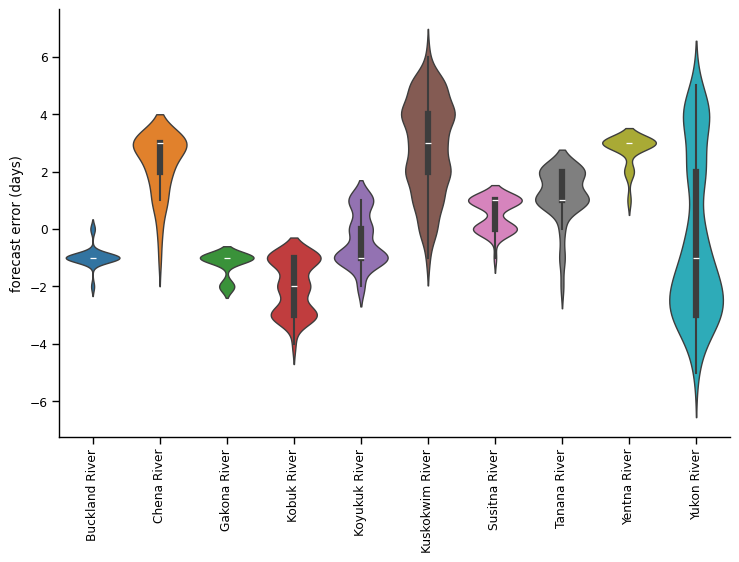

In [ ]:
ax = sns.catplot(
    data=data, kind="violin", x='river', y='forecast error (days)', hue='river',
    aspect=1.5)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabels('')

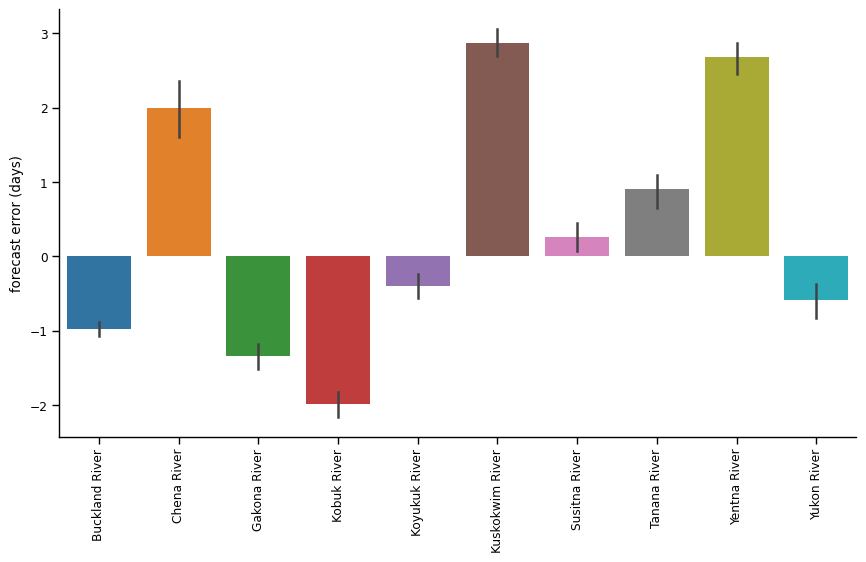

In [ ]:
ax = sns.catplot(
    data=data, kind="bar", x='river', y='forecast error (days)', hue='river',
    aspect=1.75)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabels('')